In [19]:
import numpy as np
import matplotlib.pyplot as plt
import sim

def get_matriz_rotacaoZ(theta):
    matriz_rotacaoZ = np.array([[np.cos(theta), -np.sin(theta), 0],
                                [np.sin(theta), np.cos(theta),  0],
                                [0            , 0            ,  1]])
    return matriz_rotacaoZ

def plotar_referencial(origem, orientacao):
    eixo_x = np.array(orientacao[0:2, 0])
    eixo_y = np.array(orientacao[0:2, 1])
    
    plt.quiver(*origem[0:2], *eixo_x, color='g', angles='xy', scale_units='xy', scale=1)
    plt.quiver(*origem[0:2], *eixo_y, color='r', angles='xy', scale_units='xy', scale=1)
    

[[ 0.99908539 -0.04275954  0.          4.37399626]
 [ 0.04275954  0.99908539  0.         -3.37252474]
 [ 0.          0.          1.          0.03467774]
 [ 0.          0.          0.          1.        ]]
[[ 0.99907527 -0.04299541  0.         -0.74505234]
 [ 0.04299541  0.99907527  0.         -9.9389782 ]
 [ 0.          0.          1.         -0.54773945]
 [ 0.          0.          0.          1.        ]]
[[ 0.99897262 -0.04531772  0.          2.92170167]
 [ 0.04531772  0.99897262  0.          1.60034442]
 [ 0.          0.          1.          1.04229593]
 [ 0.          0.          0.          1.        ]]
[[ 0.99901131 -0.04445675  0.          8.40901566]
 [ 0.04445675  0.99901131  0.         -4.05045223]
 [ 0.          0.          1.         -0.55062008]
 [ 0.          0.          0.          1.        ]]
[[ 0.05900192  0.99825787  0.          5.95247602]
 [-0.99825787  0.05900192  0.         -0.30226338]
 [ 0.          0.          1.          0.22731641]
 [ 0.          0.          

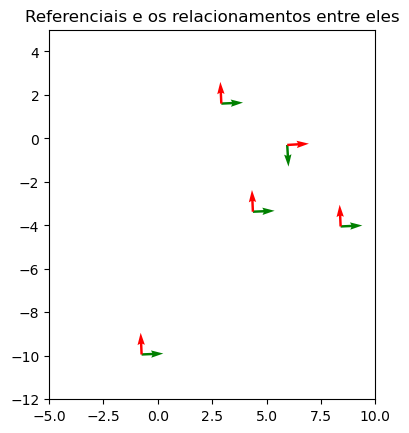

In [20]:
id_cliente = sim.simxStart("127.0.0.1", 19999, True, True, 5000, 5)

NOME_ROBO = "Ant"
OBJS = ["Joao", "casa", "poste", "arvore", "moto"]

if id_cliente != -1:
    rv, handle_robo = sim.simxGetObjectHandle(id_cliente, NOME_ROBO, sim.simx_opmode_oneshot_wait)
    constante = np.array([0, 0, 0, 1])
    trans_homogenea = []
    
    plt.figure()
    
    for obj in OBJS:
        rv, handle_obj = sim.simxGetObjectHandle(id_cliente, obj, sim.simx_opmode_oneshot_wait)
        rv, pos = sim.simxGetObjectPosition(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
        rv, orientacao = sim.simxGetObjectOrientation(id_cliente, handle_obj, handle_robo, sim.simx_opmode_oneshot_wait)
        Rz = get_matriz_rotacaoZ(orientacao[0])
        
        plotar_referencial(np.array(pos), Rz)
        
        temp = np.column_stack((Rz, pos))
        trans_homogenea_obj = np.row_stack((temp, constante))
        print(trans_homogenea_obj)
        
        trans_homogenea.append(trans_homogenea_obj)
    
    plt.title("Referenciais e os relacionamentos entre eles")
    plt.axis("scaled")
    plt.axis((-5, 10, -12, 5))
    sim.simxFinish(id_cliente)
    
else:
    print("Não foi possível conectar ao Coppelia Sim!")